In [2]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
import tensorflow as tf
from keras import regularizers

Using TensorFlow backend.


In [3]:
from keras import layers, models
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
caltech_dir = "C:/Users/GC/Desktop/product_image/Product_image_recog/image"
categories = ["apple","grape","kiwi","mandarin","melon","pear",
          "persimmon","potato","strawberry","sweet_potato",
              "tomato","watermelon"]
nb_classes = len(categories)

In [6]:
image_w = 300
image_h = 400

pixels = image_h * image_w * 3

X = []
y = []

In [7]:
for idx, cat in enumerate(categories):
    
    #one-hot encoding
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob(image_dir+"/*.png")
    
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        
        X.append(data)
        y.append(label)

        
        if i % 1000 == 0:
            print(cat, " : ", f)

apple  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/apple\apple.png
grape  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/grape\grape.png
kiwi  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/kiwi\kiwi.png
mandarin  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/mandarin\mandarin.png
melon  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/melon\melon.png
pear  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/pear\pear.png
persimmon  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/persimmon\persimmon.png
potato  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/potato\potato.png
strawberry  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/strawberry\strawberry.png
sweet_potato  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/sweet_potato\sweet_potato.png
tomato  :  C:/Users/GC/Desktop/product_image/Product_image_recog/image/tomato\tomato.p

In [8]:
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)

In [9]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [10]:
input_tensor = Input(shape=(400, 300, 3), dtype='float32', name='input')

pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(400, 300, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()


additional_model = models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(12, activation='softmax'))

additional_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 400, 300, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 400, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 400, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 200, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 200, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 200, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 100, 75, 128)      0     

In [11]:
history = additional_model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=30, 
                    validation_data=(X_test, y_test))

Train on 900 samples, validate on 300 samples
Epoch 1/30
900/900 [==============================] - 295s 328ms/step - loss: 1013.3054 - acc: 0.9103 - val_loss: 783.9811 - val_acc: 0.9167
Epoch 2/30
900/900 [==============================] - 299s 332ms/step - loss: 639.9418 - acc: 0.9167 - val_loss: 495.8533 - val_acc: 0.9167
Epoch 3/30
900/900 [==============================] - 298s 331ms/step - loss: 392.9664 - acc: 0.9167 - val_loss: 291.2901 - val_acc: 0.9167
Epoch 4/30
900/900 [==============================] - 296s 328ms/step - loss: 223.8703 - acc: 0.9167 - val_loss: 161.4610 - val_acc: 0.9167
Epoch 5/30
900/900 [==============================] - 292s 324ms/step - loss: 128.8868 - acc: 0.9167 - val_loss: 105.3773 - val_acc: 0.9167
Epoch 6/30
900/900 [==============================] - 292s 325ms/step - loss: 98.7427 - acc: 0.9167 - val_loss: 91.7479 - val_acc: 0.9167
Epoch 7/30
900/900 [==============================] - 291s 324ms/step - loss: 85.9032 - acc: 0.9167 - val_loss: 79.

In [12]:
print("정확도 : %.4f" % (additional_model.evaluate(X_test, y_test)[1]))

300/300 [==============================] - 65s 216ms/step
정확도 : 0.9167


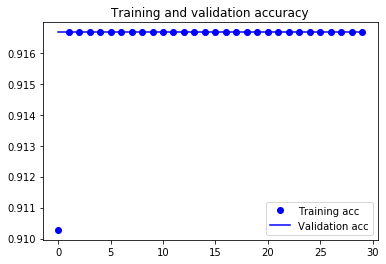

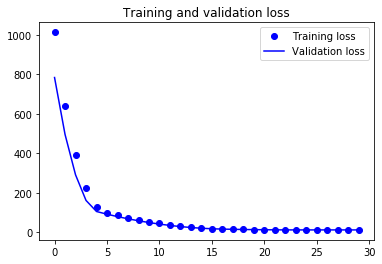

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
img_path = 'C:/Users/GC/Desktop/product_image/Product_image_recog/image/tomato/tomato.png' # 분류를 원하는 이미지 경로 설정

# img = image.load_img(img_path, target_size=(400, 300)) # imagenet에 이미지를 적용하기 위해 사이즈 수정 / 불러오기

# print(img.size)

#x = image.img_to_array(img) # 불러온 이미지를 배열로 변환


img = Image.open(img_path)
img = img.convert("RGB")
img = img.resize((300, 400))
data = np.asarray(img)
data = np.expand_dims(data, axis=0)
#x = np.expand_dims(x, axis=0) # 컴퓨터가 이미지를 인식하기 위해 이미지 차원 축소

# #x = preprocess_input(x) # 이미지 전처리

#preds = model.predict(x) # 불러온 이미지의 예측 결과를 preds 변수에 저장
preds = additional_model.predict(data) # 불러온 이미지의 예측 결과를 preds 변수에 저장

answer = None
preds_result = 0

for i in range(0,11):
    if preds[0,i] <= preds[0,i+1]:
        answer = categories[i+1]

print(answer)

tomato


In [25]:
for i in range(0,12):
    print(categories[i])

apple
grape
kiwi
mandarin
melon
pear
persimmon
potato
strawberry
sweet_potato
tomato
watermelon


In [27]:
preds[0,1]

0.08518407

In [28]:



#print('Predicted: ', decode_predictions(preds, top=3)[0])
#a = (decode_predictions(preds, top=3)[0]) # a 변수에 예축 결과를 디코딩해서 저장해서 리스트로 반환 [(코드, 분류 결과, 확률)]
#b = (a[0]) # 리스트 내에 저장되어 있는 튜플 반환
#c = (b[1]) # 튜플 값을 text로 반환
#print(c)
# 모델 저장
#model_json = model.to_json()
#with open("model.json","w") as json_file :
    #json_file.write(model_json)

# 가중치 저장
#final_weight_path = os.path.join('C:\\Users\\benbe\\Desktop' , 'model_weights.h5') #모델 가중치 파일 만들기 및 경로 지정
#print(final_weight_path) 

tomato


In [17]:
model_json = additional_model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [ ]:
additional_model.save_weights("model_w.h5")
print("Saved model to disk")